In [133]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from pandas_profiling import ProfileReport 
import warnings
warnings.filterwarnings('ignore')

In [136]:
billing_data = pd.read_csv(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Fraud in Health Records\billing_data1.csv")
billing_data.head()

invoice_id  receipt_no  charge_amount  \
0  00082EC1-94A4-42AC-A1D6-8BCC5AABF812      3975.0            200   
1  00082EC1-94A4-42AC-A1D6-8BCC5AABF812         NaN            200   
2  000B2857-FB5F-4B30-93FD-75CE975BB088         NaN          49035   
3  000B2857-FB5F-4B30-93FD-75CE975BB088         NaN          49035   
4  000F6635-E052-49F0-9F83-8B2F7F0F0970     11553.0           1500   

   charge_total  amount_paid  running_balance  initial_charge_amount  \
0           400          200                0                    200   
1           400          200                0                    200   
2         58535            0           -45535                  49035   
3         58535            0           -45535                  49035   
4          3000         1500                0                   1500   

   cancelled  approved  isinsurance  isinpatient  \
0          0         0            0            0   
1          0         0            0            0   
2          0         0           57           47   
3          0         0           57           47   
4          0         0            0            0   

  deposit_transaction_category_description  
0                   1.Load cash to account  
1                     5.Deduct to pay bill  
2                     5.Deduct to pay bill  
3                                 6.Rebate  
4                   1.Load cash to account

#### Exploratory Data Analysis

In [7]:
pp_report = ProfileReport(billing_data, title = "Billing data pandas profiling report")
pp_report.to_file(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Fraud in Health Records\billing_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
pp_report

In [137]:
billing_data.shape

(21541, 12)

In [138]:
billing_data.describe()

receipt_no  charge_amount  charge_total    amount_paid  \
count   7196.000000   21541.000000  2.154100e+04   21541.000000   
mean   10111.730962   10869.769277  1.685210e+04    4406.082447   
std     8548.196558   40058.935495  6.720698e+04   22677.769420   
min        3.000000       0.000000 -2.180000e+05       0.000000   
25%     4338.500000    1500.000000  2.920000e+03       0.000000   
50%     8132.000000    3245.000000  5.000000e+03    1000.000000   
75%    12039.250000    6440.000000  9.300000e+03    2550.000000   
max    87674.000000  782535.000000  1.569430e+06  618285.000000   

       running_balance  initial_charge_amount  cancelled  approved  \
count     21541.000000           21541.000000    21541.0   21541.0   
mean      -4948.928694            7850.882828        0.0       0.0   
std       19851.545698           30383.492541        0.0       0.0   
min     -549194.000000               0.000000        0.0       0.0   
25%       -4320.000000            1140.000000        0.0       0.0   
50%           0.000000            2000.000000        0.0       0.0   
75%           0.000000            5500.000000        0.0       0.0   
max       25500.000000          710099.000000        0.0       0.0   

        isinsurance   isinpatient  
count  21541.000000  21541.000000  
mean       3.802238      2.270740  
std       15.789592     17.869795  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        4.000000      0.000000  
max      493.000000    485.000000

In [139]:
billing_data.dtypes

invoice_id                                   object
receipt_no                                  float64
charge_amount                                 int64
charge_total                                  int64
amount_paid                                   int64
running_balance                               int64
initial_charge_amount                         int64
cancelled                                     int64
approved                                      int64
isinsurance                                   int64
isinpatient                                   int64
deposit_transaction_category_description     object
dtype: object

In [15]:
billing_data.count()

invoice_id                                  21541
receipt_no                                   7196
charge_amount                               21541
charge_total                                21541
amount_paid                                 21541
running_balance                             21541
initial_charge_amount                       21541
cancelled                                   21541
approved                                    21541
isinpatient                                 21541
isinsurance                                 21541
deposit_transaction_category_description    21541
dtype: int64

#### Outlier Detection

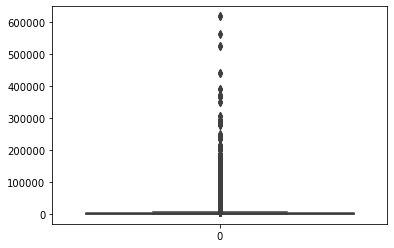

In [140]:
sns.boxplot(data = billing_data['amount_paid'])
plt.show()

<AxesSubplot:>

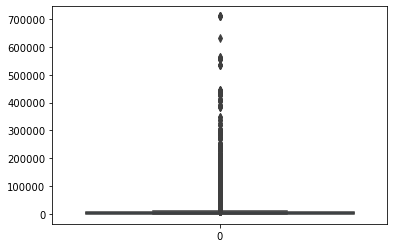

In [141]:
sns.boxplot(data = billing_data['initial_charge_amount'])

<AxesSubplot:>

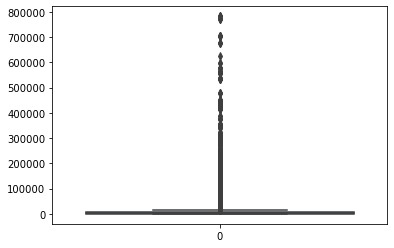

In [142]:
sns.boxplot(data = billing_data['charge_amount'])

<AxesSubplot:>

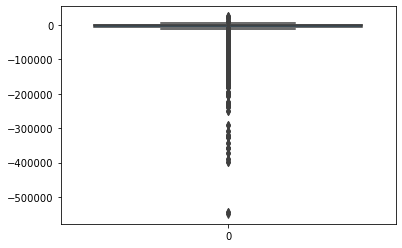

In [143]:
sns.boxplot(data = billing_data['running_balance'])

<AxesSubplot:>

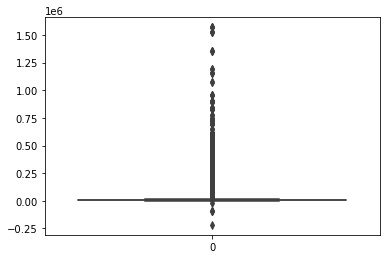

In [144]:
sns.boxplot(data = billing_data['charge_total'])

#### Data Cleaning

In [90]:
new_billing_data = billing_data.drop(['invoice_id','receipt_no', 'charge_total', 'initial_charge_amount'], axis = 'columns')
new_billing_data.head()

charge_amount  amount_paid  running_balance  cancelled  approved  \
0            200          200                0          0         0   
1            200          200                0          0         0   
2          49035            0           -45535          0         0   
3          49035            0           -45535          0         0   
4           1500         1500                0          0         0   

   isinpatient  isinsurance deposit_transaction_category_description  
0            0            0                   1.Load cash to account  
1            0            0                     5.Deduct to pay bill  
2           47           57                     5.Deduct to pay bill  
3           47           57                                 6.Rebate  
4            0            0                   1.Load cash to account

#### Feature Engineering

In [67]:
from sklearn.preprocessing import LabelEncoder

In [71]:
le = LabelEncoder()

In [78]:
cancelled_label = le.fit_transform(new_billing_data['cancelled'])
approved_label = le.fit_transform(new_billing_data['approved'])
isinpatient_label = le.fit_transform(new_billing_data['isinpatient'])
isinsurance_label = le.fit_transform(new_billing_data['isinsurance'])
description_label = le.fit_transform(new_billing_data['deposit_transaction_category_description'])

In [80]:
new_billing_data['cancelled'] = cancelled_label
new_billing_data['approved'] = approved_label
new_billing_data['isinpatient'] = isinpatient_label
new_billing_data['isinsurance'] = isinsurance_label
new_billing_data['deposit_transaction_category_description'] = description_label

In [83]:
new_billing_data

charge_amount  amount_paid  running_balance  initial_charge_amount  \
0                200          200                0                    200   
1                200          200                0                    200   
2              49035            0           -45535                  49035   
3              49035            0           -45535                  49035   
4               1500         1500                0                   1500   
...              ...          ...              ...                    ...   
21536           2060         2060                0                   2060   
21537           2060         2060                0                   2060   
21538          27395        25195                0                   2700   
21539          27395        25195                0                   2700   
21540          27395        25195                0                   2700   

       cancelled  approved  isinpatient  isinsurance  \
0              0         0            0            0   
1              0         0            0            0   
2              0         0           47           55   
3              0         0           47           55   
4              0         0            0            0   
...          ...       ...          ...          ...   
21536          0         0            0            0   
21537          0         0            0            0   
21538          0         0            1            0   
21539          0         0            1            0   
21540          0         0            1            0   

       deposit_transaction_category_description  
0                                             0  
1                                             2  
2                                             2  
3                                             3  
4                                             0  
...                                         ...  
21536                                         0  
21537                                         2  
21538                                         0  
21539                                         1  
21540                                         2  

[21541 rows x 9 columns]

#### Machine Learning Section

##### Isolation Forest

In [84]:
from sklearn.ensemble import IsolationForest

In [85]:
model = IsolationForest(n_estimators = 50, max_samples='auto',max_features=1.0, contamination='auto')
print(model.get_params())

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [86]:
model.fit(new_billing_data)

IsolationForest(n_estimators=50)

In [87]:
#print("Accuracy:", list(predictions).count(1)/predictions.shape[0])

#### Print out predictions (anomalies)

In [88]:
new_billing_data1= new_billing_data.copy()

In [89]:
new_billing_data1['scores']=model.decision_function(new_billing_data)
new_billing_data1['anomaly']=model.predict(new_billing_data)
new_billing_data1.head(20)

charge_amount  amount_paid  running_balance  initial_charge_amount  \
0             200          200                0                    200   
1             200          200                0                    200   
2           49035            0           -45535                  49035   
3           49035            0           -45535                  49035   
4            1500         1500                0                   1500   
5            1500         1500                0                   1500   
6            4225            0            -4225                   4225   
7            2500            0            -2500                   2500   
8           10230            0           -10230                  10230   
9           24760            0           -24760                  24760   
10           4850            0            -4150                   4850   
11           1260            0            -1260                   1260   
12             40           40                0                     40   
13             40           40                0                     40   
14           5500         1000            -4500                   5500   
15           5500         1000            -4500                   5500   
16           1500         1500                0                   1500   
17           1500         1500                0                   1500   
18          18560            0           -14310                  18560   
19           1150            0            -1150                   1150   

    cancelled  approved  isinpatient  isinsurance  \
0           0         0            0            0   
1           0         0            0            0   
2           0         0           47           55   
3           0         0           47           55   
4           0         0            0            0   
5           0         0            0            0   
6           0         0            0            6   
7           0         0            0            1   
8           0         0            0           21   
9           0         0            0            8   
10          0         0            0            6   
11          0         0            0            5   
12          0         0            0            0   
13          0         0            0            0   
14          0         0            0            6   
15          0         0            0            6   
16          0         0            0            0   
17          0         0            0            0   
18          0         0            0           10   
19          0         0            0            4   

    deposit_transaction_category_description    scores  anomaly  
0                                          0  0.123303        1  
1                                          2  0.159142        1  
2                                          2 -0.170100       -1  
3                                          3 -0.195077       -1  
4                                          0  0.147946        1  
5                                          2  0.166592        1  
6                                          2  0.144461        1  
7                                          2  0.151593        1  
8                                          2  0.080386        1  
9                                          2 -0.009203       -1  
10                                         2  0.149117        1  
11                                         2  0.144367        1  
12                                         0  0.123289        1  
13                                         2  0.159917        1  
14                                         2  0.142429        1  
15                                         4  0.016871        1  
16                                         0  0.147946        1  
17                                         2  0.166592        1  
18                                         2  0.036531        1  
19             

##### Percentage of anormalies

In [91]:
print("Percentage of anomalies in data: {:.2f}".format((len(new_billing_data.loc[new_billing_data1['anomaly']==-1])/len(new_billing_data1))*100))

Percentage of anomalies in data: 7.73


<AxesSubplot:>

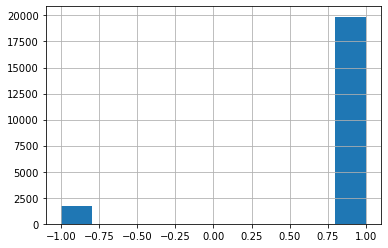

In [92]:
new_billing_data1['anomaly'].hist()

<AxesSubplot:>

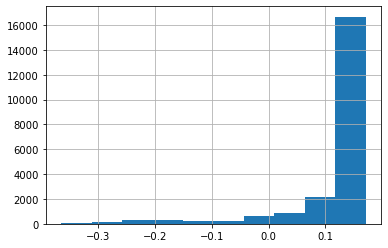

In [93]:
new_billing_data1['scores'].hist()

#### Model Evaluation

In [120]:
#print("Accuracy of the model: {:.2f}".format((len(new_billing_data1.loc[new_billing_data1['anomaly']==1])/len(new_billing_data1))*100))

##### Isolation Forest Accuracy

In [98]:
print("Accuracy:", list(new_billing_data1['anomaly']).count(1)/new_billing_data1.shape[0] * 100)

Accuracy: 92.2705538275846


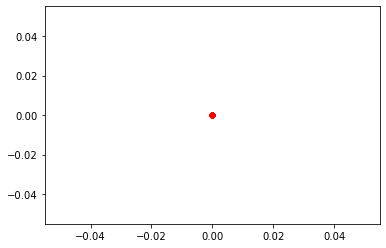

In [131]:
plt.scatter(new_billing_data1['scores'] == 1, new_billing_data1['scores']== -1, c="red", s=20) #edgecolor="k"

#### Extended Isotion Forest

In [82]:
import h2o
h2o.init()
from h2o.estimators import H2OExtendedIsolationForestEstimator

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  -------------------------------------------------------------------
H2O_cluster_uptime:         12 days 0 hours 54 mins
H2O_cluster_timezone:       Africa/Nairobi
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.2
H2O_cluster_version_age:    28 days, 14 hours and 24 minutes
H2O_cluster_name:           H2O_from_python_Keith_Martins_nhwpfd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.463 Gb
H2O_cluster_total_cores:    4
H2O_cluster_allowed_cores:  4
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, Infogram, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.9.7 final
--------------------------  -------------------------------------------------------------------

In [86]:
data_file = h2o.import_file(r"C:\Users\Keith Martins\OneDrive\Documents\PYTHON\FIVERR PROJECTS\Fraud in Health Records\extisolation_billing_data.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [87]:
data_file.head()

charge_amount amount_paid running_balance isinpatient isinsurance 
 
 
 200 200 0 0 0 
 200 200 0 0 0 
 49035 0 -45535 47 57 
 49035 0 -45535 47 57 
 1500 1500 0 0 0 
 1500 1500 0 0 0 
 4225 0 -4225 0 6 
 2500 0 -2500 0 1 
 10230 0 -10230 0 21 
 24760 0 -24760 0 8

In [88]:
predictors = ['charge_amount', 'amount_paid', 'running_balance',
                'isinpatient', 'isinsurance']
ext_isf = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                             ntrees = 100,
                                             sample_size = 256,
                                             extension_level = len(predictors) - 1)

In [89]:
ext_isf.train(x = predictors,
             training_frame = data_file)


extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
Model Details
H2OExtendedIsolationForestEstimator :  Extended Isolation Forest
Model Key:  eif.hex


Model Summary: 


number_of_trees  size_of_subsample  extension_level          seed  \
0                100                256                4 -1.788245e+18   

   number_of_trained_trees  min_depth  max_depth  mean_depth  min_leaves  ...  \
0                    100.0        8.0        8.0         8.0        10.0  ...   

   mean_leaves  min_isolated_point  max_isolated_point  mean_isolated_point  \
0         25.1                 3.0                22.0                 9.64   

   min_not_isolated_point  max_not_isolated_point  mean_not_isolated_point  \
0                   234.0                   253.0                   246.36   

   min_zero_splits  max_zero_splits  mean_zero_splits  
0              2.0             24.0              8.24  

[1 rows x 21 columns]

In [90]:
anomaly_scores = ext_isf.predict(data_file)

extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [92]:
anomaly_scores['anomaly_score']

anomaly_score 
 
 
 0.328051 
 0.328051 
 0.52681 
 0.52681 
 0.316949 
 0.316949 
 0.327986 
 0.328344 
 0.365934 
 0.463783

#### Accuracy

In [254]:
print("Accuracy:", list(anomaly_scores['anomaly_score']).count(0)*new_billing_data1.shape[0] / 1000  , "%")

Accuracy: 21.541 %


In [99]:
anomaly_scores['anomaly_score'].shape

(21541, 1)

#### Principal Component Analysis

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(2)
pca.fit(new_billing_data1)

PCA(n_components=2)

In [103]:
data = pd.DataFrame(pca.transform(new_billing_data1))
data.head()

0             1
0 -14619.974612    124.386675
1 -14619.974608    124.386661
2  61072.567586 -31175.539946
3  61072.567588 -31175.539952
4 -12610.293379    771.666407

In [104]:
z = np.array(data)

In [106]:
#plt.title("IsolationForest")
#plt.contourf(z, cmap=plt.cm.Blues_r)
#b1= plt.scatter(data[0], data[1], c='green', s=20, label="normal points")

#b1 =plt.scatter(data.iloc[outlier_index,0],data.iloc[outlier_index,1], c='red',s=20,  edgecolor="red",label="predicted outliers")
#plt.legend(loc="upper right")
#plt.show()

In [107]:
#b2 = plt.scatter(data[0], data[1], c='blue', s=20, label="normal points")
#b2 = plt.scatter(data.iloc[outlier_index,-1],data.iloc[outlier_index,-1], c='red',s=20,  edgecolor="red",label="predicted outliers")

#### K-Means Clustering

In [121]:
from sklearn.cluster import KMeans

In [122]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [123]:
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Outliers plot')

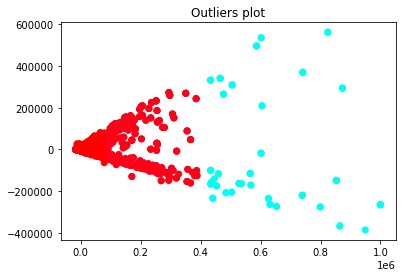

In [129]:
data1 = data.copy()
data1['clusters'] = identified_clusters
plt.scatter(data1[0],data1[1],c=data1['clusters'],cmap='hsv')
plt.title('Outliers plot')

In [111]:
train_data = new_billing_data1[:17232]
test_data = new_billing_data1[17232:]

In [130]:
X_train = train_data[['charge_amount', 'amount_paid', 'running_balance', 'isinpatient', 'isinsurance']]
y_train = train_data['anomaly']
X_test = test_data[['charge_amount', 'amount_paid', 'running_balance', 'isinpatient', 'isinsurance']]
y_test = test_data['anomaly']

In [220]:
k_means = KMeans(6)

In [221]:
k_means.fit(X_train)

KMeans(n_clusters=6)

In [222]:
y_pred = k_means.fit_predict(X_test)

#### Mean Absolute Error

In [223]:
km_errors = abs(y_test - y_pred)
km_errors

17232    1
17233    1
17234    1
17235    1
17236    1
        ..
21536    1
21537    1
21538    1
21539    1
21540    1
Name: anomaly, Length: 4309, dtype: int32

In [224]:
print('Mean Absolute Error:', round(np.mean(km_errors), 2), 'degrees.')

Mean Absolute Error: 1.19 degrees.


#### Mean Absolute Percentage Error

In [225]:
mape = 100 * (km_errors / y_test)

In [226]:
mape

17232    100.0
17233    100.0
17234    100.0
17235    100.0
17236    100.0
         ...  
21536    100.0
21537    100.0
21538   -100.0
21539   -100.0
21540   -100.0
Name: anomaly, Length: 4309, dtype: float64

#### Accuracy

In [227]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 31.82 %.
